In [1]:
from PIL import Image, ImageDraw
import torch
import torchvision
from transformers import pipeline, DetrImageProcessor, DetrForObjectDetection

In [2]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

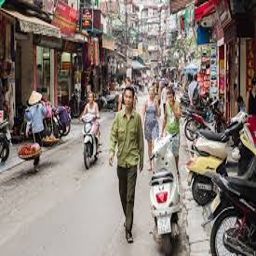

In [3]:
img1=Image.open('hanoi1.jpeg')
img1=img1.resize((256,256))
img1

Using Pipeline

In [4]:
threshold=0.8
model_id='facebook/detr-resnet-50'
pipe=pipeline(task='object-detection', model=model_id, threshold=threshold, device=device)

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [5]:
preds=pipe(img1)

In [6]:
preds

[{'score': 0.8478978872299194,
  'label': 'bicycle',
  'box': {'xmin': 50, 'ymin': 112, 'xmax': 67, 'ymax': 137}},
 {'score': 0.9697436094284058,
  'label': 'motorcycle',
  'box': {'xmin': 187, 'ymin': 112, 'xmax': 256, 'ymax': 256}},
 {'score': 0.8809643983840942,
  'label': 'person',
  'box': {'xmin': 23, 'ymin': 93, 'xmax': 46, 'ymax': 145}},
 {'score': 0.9534163475036621,
  'label': 'motorcycle',
  'box': {'xmin': 186, 'ymin': 111, 'xmax': 254, 'ymax': 207}},
 {'score': 0.8799443244934082,
  'label': 'person',
  'box': {'xmin': 160, 'ymin': 84, 'xmax': 182, 'ymax': 136}},
 {'score': 0.9311867356300354,
  'label': 'person',
  'box': {'xmin': 57, 'ymin': 102, 'xmax': 70, 'ymax': 134}},
 {'score': 0.9974236488342285,
  'label': 'person',
  'box': {'xmin': 80, 'ymin': 93, 'xmax': 101, 'ymax': 141}},
 {'score': 0.9432621002197266,
  'label': 'person',
  'box': {'xmin': 187, 'ymin': 73, 'xmax': 199, 'ymax': 104}},
 {'score': 0.8303022384643555,
  'label': 'person',
  'box': {'xmin': 248,

In [7]:
len(preds)

15

Visualization

Detected bicycle with confidence 0.85 et location dict_values([50, 112, 67, 137])
Detected motorcycle with confidence 0.97 et location dict_values([187, 112, 256, 256])
Detected person with confidence 0.88 et location dict_values([23, 93, 46, 145])
Detected motorcycle with confidence 0.95 et location dict_values([186, 111, 254, 207])
Detected person with confidence 0.88 et location dict_values([160, 84, 182, 136])
Detected person with confidence 0.93 et location dict_values([57, 102, 70, 134])
Detected person with confidence 1.0 et location dict_values([80, 93, 101, 141])
Detected person with confidence 0.94 et location dict_values([187, 73, 199, 104])
Detected person with confidence 0.83 et location dict_values([248, 77, 256, 115])
Detected person with confidence 0.82 et location dict_values([41, 96, 53, 130])
Detected person with confidence 0.93 et location dict_values([23, 93, 46, 171])
Detected person with confidence 1.0 et location dict_values([108, 86, 145, 243])
Detected motorcy

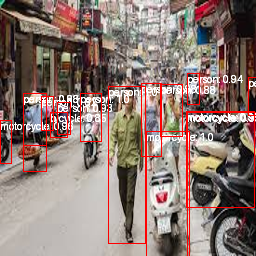

In [ ]:
draw1=ImageDraw.Draw(img1)
for pred in preds:
    score=pred['score']
    label=pred['label']
    print(f'Detected {label} with confidence {round(score,2)} et location {pred['box'].values()}')
    x,y,x2,y2=pred['box'].values()
    draw1.rectangle((x,y,x2,y2), outline='red', width=1)
    draw1.text((x,y), f'{label}: {round(score,2)}', fill='white')
img1


Manual

In [11]:
processor=DetrImageProcessor.from_pretrained(model_id, revision='no_timm')
model=DetrForObjectDetection.from_pretrained(model_id, revision='no_timm')

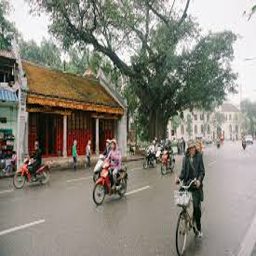

In [12]:
img2=Image.open('hanoi2.jpeg')
img2=img2.resize((256,256))
img2

In [13]:
inputs=processor(img2, return_tensors='pt')
output=model(**inputs)
output

DetrObjectDetectionOutput(loss=None, loss_dict=None, logits=tensor([[[-14.7801,   5.0407,   5.0671,  ..., -12.3912, -11.9037,   6.7941],
         [-15.2572,   6.7388,   3.5721,  ..., -13.5626,  -9.6558,   7.5409],
         [-12.0695,   1.9047,  11.1609,  ..., -12.8850, -13.1358,   5.4527],
         ...,
         [-16.2856,   6.1317,   3.7229,  ..., -14.6433, -12.0349,   7.9733],
         [-13.0195,  11.3254,   0.9112,  ..., -11.7605,  -8.1091,   4.3704],
         [-15.4756,   7.2418,   2.5254,  ..., -14.3731, -10.1529,   7.1990]]],
       grad_fn=<ViewBackward0>), pred_boxes=tensor([[[0.0234, 0.6461, 0.0469, 0.0706],
         [0.5851, 0.6047, 0.0322, 0.0678],
         [0.1209, 0.6820, 0.1499, 0.1140],
         [0.6274, 0.5742, 0.0334, 0.0470],
         [0.4334, 0.5724, 0.0471, 0.0708],
         [0.4486, 0.6441, 0.0699, 0.1818],
         [0.5724, 0.6270, 0.0321, 0.0507],
         [0.2983, 0.6046, 0.0217, 0.0804],
         [0.3243, 0.5814, 0.0224, 0.0644],
         [0.0553, 0.3482, 0.039

In [17]:
target_size=torch.tensor([[img2.size[0], img2.size[1]]])
result=processor.post_process_object_detection(
    outputs=output,
    threshold=threshold,
    target_sizes=target_size
    )[0]
result

{'scores': tensor([0.9817, 0.9976, 0.9377, 0.8907, 0.9867, 0.8625, 0.9964, 0.9947, 0.9642,
         0.9182, 0.9832, 0.8752, 0.9920, 0.9644, 0.9989],
        grad_fn=<IndexBackward0>),
 'labels': tensor([2, 2, 2, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1]),
 'boxes': tensor([[ 11.7571, 159.9915,  50.1371, 189.1868],
         [173.4189, 181.1517, 199.1069, 256.0245],
         [159.8323, 158.3214, 171.5325, 174.7336],
         [245.4303, 136.0655, 254.8066, 145.0412],
         [ 71.7136, 140.7855,  78.0679, 167.7933],
         [149.1996, 140.8269, 159.5397, 164.0166],
         [ 92.3194, 164.4412, 127.6588, 206.9135],
         [ 95.2075, 140.2053, 122.7358, 191.6533],
         [ 85.2822, 140.5461,  92.7903, 165.5945],
         [146.6095, 147.0346, 156.0794, 165.6960],
         [ 22.8433, 143.9857,  42.9795, 179.4492],
         [241.8490, 137.3670, 247.7800, 151.6911],
         [160.0657, 147.0040, 170.7941, 170.7870],
         [142.9183, 155.0957, 155.5237, 168.9061],
         [175.6527, 142.045

In [16]:
draw2=ImageDraw.Draw(img2)
for score, label, box in zip(result['scores'], result['labels'], result['boxes']):
    box=[round(i,2) for i in box.tolist()]
    print(f'Detectted {model.config.id2label[label.item()]} with confidence {round(score.item(),2)} at location {box}')
    x,y,x2,y2=tuple(box)
    draw2.rectangle((x,y,x2,y2), outline='red', width=1)
    draw2.text((x,y), f'{model.config.id2label[label.item()]}: {round(score.item(),2)}', fill="white")

Detectted bicycle with confidence 0.98 at location [11.76, 159.99, 50.14, 189.19]
Detectted bicycle with confidence 1.0 at location [173.42, 181.15, 199.11, 256.02]
Detectted bicycle with confidence 0.94 at location [159.83, 158.32, 171.53, 174.73]
Detectted car with confidence 0.89 at location [245.43, 136.07, 254.81, 145.04]
Detectted person with confidence 0.99 at location [71.71, 140.79, 78.07, 167.79]
Detectted person with confidence 0.86 at location [149.2, 140.83, 159.54, 164.02]
Detectted bicycle with confidence 1.0 at location [92.32, 164.44, 127.66, 206.91]
Detectted person with confidence 0.99 at location [95.21, 140.21, 122.74, 191.65]
Detectted person with confidence 0.96 at location [85.28, 140.55, 92.79, 165.59]
Detectted person with confidence 0.92 at location [146.61, 147.03, 156.08, 165.7]
Detectted person with confidence 0.98 at location [22.84, 143.99, 42.98, 179.45]
Detectted person with confidence 0.88 at location [241.85, 137.37, 247.78, 151.69]
Detectted person 

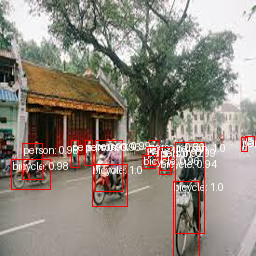

In [19]:
img2

Batch processing

In [21]:
imgs=[Image.open('hanoi1.jpeg').resize((256,256)), Image.open('hanoi2.jpeg').resize((256,256))]
queries=['person', 'bicycle','car','motocycle']

In [22]:
inputs=processor(text=queries, images=imgs, return_tensors='pt')
inputs

Unused or unrecognized kwargs: text.


{'pixel_values': tensor([[[[-2.1179, -2.1179, -2.1008,  ..., -1.4672, -1.4843, -1.4843],
          [-2.1179, -2.1179, -2.1008,  ..., -1.4672, -1.4843, -1.4843],
          [-2.0323, -2.0323, -1.9809,  ..., -1.4843, -1.4843, -1.4843],
          ...,
          [ 1.0502,  1.0502,  1.0502,  ..., -0.9020, -1.1247, -1.1247],
          [ 1.0502,  1.0502,  1.0502,  ..., -0.9192, -1.1247, -1.1247],
          [ 1.0502,  1.0502,  1.0502,  ..., -0.9192, -1.1247, -1.1247]],

         [[ 0.6779,  0.6779,  0.6604,  ..., -1.3880, -1.4055, -1.4055],
          [ 0.6779,  0.6779,  0.6604,  ..., -1.3880, -1.4055, -1.4055],
          [ 0.7479,  0.7479,  0.7304,  ..., -1.3880, -1.4055, -1.4055],
          ...,
          [ 1.0805,  1.0805,  1.0805,  ..., -0.8102, -1.0378, -1.0378],
          [ 1.0805,  1.0805,  1.0805,  ..., -0.8277, -1.0378, -1.0378],
          [ 1.0805,  1.0805,  1.0805,  ..., -0.8277, -1.0378, -1.0378]],

         [[-0.0790, -0.0790, -0.0790,  ..., -1.2293, -1.2467, -1.2467],
          [-0

In [23]:
outputs=model(**inputs)
outputs

DetrObjectDetectionOutput(loss=None, loss_dict=None, logits=tensor([[[-14.2347,   4.3737,   3.3532,  ..., -10.3302,  -8.6378,   6.5474],
         [-14.6397,   6.7555,   2.8787,  ..., -13.3087,  -9.5254,   7.2967],
         [-12.0106,   1.9592,   1.4963,  ..., -10.6465, -10.0594,   5.4986],
         ...,
         [-15.7576,   4.5563,  -2.6056,  ..., -10.2116,  -9.4796,   7.0826],
         [-16.4196,   4.4693,   1.0985,  ..., -10.2213,  -7.7365,   7.5628],
         [-15.7159,   6.7208,  -1.1696,  ..., -10.4967,  -7.4615,   7.4306]],

        [[-14.7801,   5.0407,   5.0671,  ..., -12.3912, -11.9037,   6.7941],
         [-15.2572,   6.7388,   3.5721,  ..., -13.5626,  -9.6558,   7.5409],
         [-12.0695,   1.9047,  11.1609,  ..., -12.8850, -13.1358,   5.4527],
         ...,
         [-16.2856,   6.1317,   3.7229,  ..., -14.6433, -12.0349,   7.9733],
         [-13.0195,  11.3254,   0.9112,  ..., -11.7605,  -8.1091,   4.3704],
         [-15.4756,   7.2418,   2.5254,  ..., -14.3731, -10.152

In [24]:
target_size=[x.size[::-1] for x in imgs]
results=processor.post_process_object_detection(
    outputs,
    threshold=threshold,
    target_sizes=target_size
    )

In [25]:
results[0]

{'scores': tensor([0.8488, 0.9698, 0.8809, 0.9534, 0.8798, 0.9312, 0.9974, 0.9433, 0.8302,
         0.8208, 0.9348, 0.9996, 0.9575, 0.9801, 0.9970],
        grad_fn=<IndexBackward0>),
 'labels': tensor([2, 4, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 4]),
 'boxes': tensor([[ 5.0834e+01,  1.1227e+02,  6.7358e+01,  1.3766e+02],
         [ 1.8784e+02,  1.1221e+02,  2.5608e+02,  2.5633e+02],
         [ 2.3797e+01,  9.3720e+01,  4.6899e+01,  1.4544e+02],
         [ 1.8666e+02,  1.1139e+02,  2.5480e+02,  2.0744e+02],
         [ 1.6003e+02,  8.4106e+01,  1.8257e+02,  1.3670e+02],
         [ 5.7190e+01,  1.0248e+02,  7.0755e+01,  1.3411e+02],
         [ 8.0598e+01,  9.3732e+01,  1.0182e+02,  1.4114e+02],
         [ 1.8771e+02,  7.3575e+01,  1.9979e+02,  1.0495e+02],
         [ 2.4852e+02,  7.7917e+01,  2.5602e+02,  1.1530e+02],
         [ 4.1223e+01,  9.6377e+01,  5.3678e+01,  1.3035e+02],
         [ 2.3226e+01,  9.3178e+01,  4.6186e+01,  1.7144e+02],
         [ 1.0833e+02,  8.6242e+01,  1.4556e+02,

Detectted bicycle with confidence 0.85 at location [50.83, 112.27, 67.36, 137.66]
Detectted motorcycle with confidence 0.97 at location [187.84, 112.21, 256.08, 256.33]
Detectted person with confidence 0.88 at location [23.8, 93.72, 46.9, 145.44]
Detectted motorcycle with confidence 0.95 at location [186.66, 111.39, 254.8, 207.44]
Detectted person with confidence 0.88 at location [160.03, 84.11, 182.57, 136.7]
Detectted person with confidence 0.93 at location [57.19, 102.48, 70.75, 134.11]
Detectted person with confidence 1.0 at location [80.6, 93.73, 101.82, 141.14]
Detectted person with confidence 0.94 at location [187.71, 73.57, 199.79, 104.95]
Detectted person with confidence 0.83 at location [248.52, 77.92, 256.02, 115.3]
Detectted person with confidence 0.82 at location [41.22, 96.38, 53.68, 130.35]
Detectted person with confidence 0.93 at location [23.23, 93.18, 46.19, 171.44]
Detectted person with confidence 1.0 at location [108.33, 86.24, 145.56, 243.57]
Detectted motorcycle w

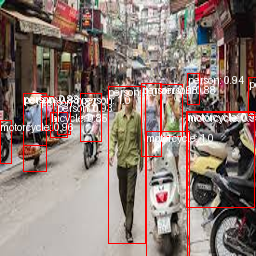

In [26]:
draw3=ImageDraw.Draw(imgs[0])
for score, label, box in zip(results[0]['scores'], results[0]['labels'], results[0]['boxes']):
    box=[round(i,2) for i in box.tolist()]
    print(f'Detectted {model.config.id2label[label.item()]} with confidence {round(score.item(),2)} at location {box}')
    x,y,x2,y2=tuple(box)
    draw3.rectangle((x,y,x2,y2), outline='red', width=1) 
    draw3.text((x,y), f'{model.config.id2label[label.item()]}: {round(score.item(),2)}', fill="white")
imgs[0]

Detectted bicycle with confidence 0.98 at location [11.76, 159.99, 50.14, 189.19]
Detectted bicycle with confidence 1.0 at location [173.42, 181.15, 199.11, 256.02]
Detectted bicycle with confidence 0.94 at location [159.83, 158.32, 171.53, 174.73]
Detectted car with confidence 0.89 at location [245.43, 136.07, 254.81, 145.04]
Detectted person with confidence 0.99 at location [71.71, 140.79, 78.07, 167.79]
Detectted person with confidence 0.86 at location [149.2, 140.83, 159.54, 164.02]
Detectted bicycle with confidence 1.0 at location [92.32, 164.44, 127.66, 206.91]
Detectted person with confidence 0.99 at location [95.21, 140.21, 122.74, 191.65]
Detectted person with confidence 0.96 at location [85.28, 140.55, 92.79, 165.59]
Detectted person with confidence 0.92 at location [146.61, 147.03, 156.08, 165.7]
Detectted person with confidence 0.98 at location [22.84, 143.99, 42.98, 179.45]
Detectted person with confidence 0.88 at location [241.85, 137.37, 247.78, 151.69]
Detectted person 

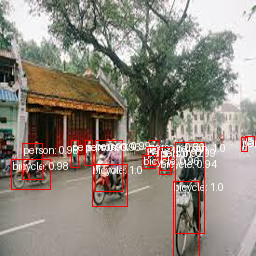

In [27]:
draw4=ImageDraw.Draw(imgs[1])
for score, label, box in zip(results[1]['scores'], results[1]['labels'], results[1]['boxes']):
    box=[round(i,2) for i in box.tolist()]
    print(f'Detectted {model.config.id2label[label.item()]} with confidence {round(score.item(),2)} at location {box}')
    x,y,x2,y2=tuple(box)
    draw4.rectangle((x,y,x2,y2), outline='red', width=1) 
    draw4.text((x,y), f'{model.config.id2label[label.item()]}: {round(score.item(),2)}', fill="white")
imgs[1]